In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
kopa =pd.read_csv("KOPA.csv")
kopa.dtypes
#loanstatus360 is for classification, amountpaid360 is for regression

Product           object
CustomerGender    object
Location          object
Region            object
TotalPrice         int64
StartDate         object
Deposit            int64
DailyRate          int64
TotalDays          int64
AmountPaid30       int64
AmountPaid60       int64
AmountPaid360      int64
LoanStatus360     object
dtype: object

clean data

In [6]:
kopa.isnull().sum()
#there are no null values hence we shalll not work wih null values


Product           0
CustomerGender    0
Location          0
Region            0
TotalPrice        0
StartDate         0
Deposit           0
DailyRate         0
TotalDays         0
AmountPaid30      0
AmountPaid60      0
AmountPaid360     0
LoanStatus360     0
dtype: int64

In [7]:
#is there dublicates
#the exploratory was left to you, in analysis
kopa.duplicated().sum()

0

FEATURE ENGINEERING

In [8]:
#fe is a step you take before modeling and ensure the model contains only numerical values,unless you are using catboost algorithms
kopa_regression= kopa.copy()
kopa_classification = kopa.copy()


In [9]:
#regression
cat_columns = [column for column in kopa_regression if kopa_regression[column].dtype=='O']
cat_columns #give you the list of columns that have categorical data.

['Product',
 'CustomerGender',
 'Location',
 'Region',
 'StartDate',
 'LoanStatus360']

In [20]:
#label encoder
from sklearn.preprocessing import LabelEncoder

In [11]:
#label encode the dara
#instantiate the encoder
encoder = LabelEncoder()

#fit and transfer the data
for column in cat_columns:
        kopa_regression[column] = encoder.fit_transform(kopa_regression[column])
        
kopa_regression.head()

,Product,CustomerGender,Location,Region,TotalPrice,StartDate,Deposit,DailyRate,TotalDays,AmountPaid30,AmountPaid60,AmountPaid360,LoanStatus360
0,1,1,108,10,16600,1255,2000,40,365,3121,4241,13621,0
1,1,1,219,11,16600,44,2000,40,365,3061,4171,15041,0
2,2,0,441,13,15600,470,1000,40,365,2160,3280,15340,0
3,1,1,552,0,16600,532,2000,40,365,3041,4241,15321,0
4,3,0,659,10,20250,201,2000,50,365,3470,4820,13720,0


<AxesSubplot:>

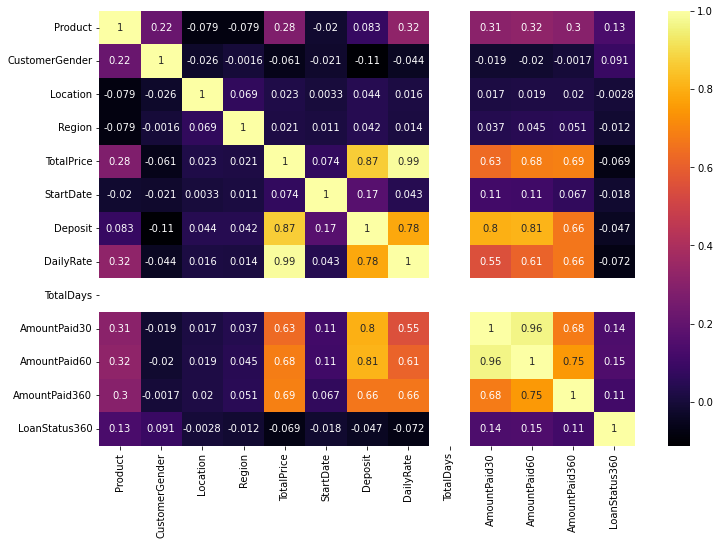

In [12]:
#check the correlation
#get correlation matrix
corr_matrix  =kopa_regression.corr()
#visualize the matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap='inferno')

In [18]:
#we can see that total days is useless so we drop it,and the ones with low correlation
#we can also check the correlation between various columns
kopa_regression.drop(['Location',"StartDate","TotalDays",
                  "DailyRate","AmountPaid30"],axis=1)


,Product,CustomerGender,Region,TotalPrice,Deposit,AmountPaid60,AmountPaid360,LoanStatus360
0,1,1,10,16600,2000,4241,13621,0
1,1,1,11,16600,2000,4171,15041,0
2,2,0,13,15600,1000,3280,15340,0
3,1,1,0,16600,2000,4241,15321,0
4,3,0,10,20250,2000,4820,13720,0
...,...,...,...,...,...,...,...,...
9190,0,0,10,20250,2000,4301,20250,2
9191,3,0,14,20250,2000,5501,20250,2
9192,1,0,10,16600,2000,4601,16600,2
9193,1,1,12,16600,2000,4600,16600,2


MODELLING

In [15]:
#first, separate the target from the feature. X(features) and Y
x = kopa_regression.drop('AmountPaid360', axis=1)
y= kopa_regression['AmountPaid360']

In [22]:
#plitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size =0.2,random_state=42)
x_train.dtypes 

Product           int32
CustomerGender    int32
Location          int32
Region            int32
TotalPrice        int64
StartDate         int32
Deposit           int64
DailyRate         int64
TotalDays         int64
AmountPaid30      int64
AmountPaid60      int64
LoanStatus360     int32
dtype: object

In [17]:
#creating our first model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [45]:
#instantiate our model
linear = LinearRegression()
#Train
linear.fit(x_train,y_train)
#test
prediction = linear.predict(x_test)
#Evaluate the model
error = mean_squared_error(y_test,Prediction)
pring(error)

ValueError: could not convert string to float: 'Product A'

In [48]:
#for decision tree
dt = DecisionTreeRegressor()
#Train
dt.fit(x_train,y_train)
#test
prediction = dt.predict(x_test)
#Evaluate the model
error = mean_squared_error(y_test,Prediction,squared=False)
pring(error)

ValueError: could not convert string to float: 'Product A'

In [47]:
#the dacision tree is a bit better

# second class

In [5]:
#Clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn import datasets
cmap = matplotlib.cm.get_cmap("nipy_spectral")



In [8]:
iris_data = datasets.load_iris()
X,y = iris_data.data,iris_data.target
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])